In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
#Read file
df = pd.read_csv('Iowa_Liquor_Sales.csv')

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
pd.options.display.max_columns = None
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,NaN,NaN,255.0,Wilson Daniels Ltd.,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,NaN,NaN,255.0,Wilson Daniels Ltd.,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,NaN,NaN,130.0,Disaronno International LLC,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,NaN,NaN,65.0,Jim Beam Brands,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,NaN,NaN,130.0,Disaronno International LLC,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [4]:
df.isnull().sum()

Invoice/Item Number          0
Date                         0
Store Number                 0
Store Name                   0
Address                   2376
City                      2375
Zip Code                  2420
Store Location            2375
County Number            79178
County                   79178
Category                  8020
Category Name            16086
Vendor Number                3
Vendor Name                  1
Item Number                  0
Item Description             0
Pack                         0
Bottle Volume (ml)           0
State Bottle Cost           10
State Bottle Retail         10
Bottles Sold                 0
Sale (Dollars)              10
Volume Sold (Liters)         0
Volume Sold (Gallons)        0
dtype: int64

In [5]:
#Removal of data with null
# df = df.dropna()

In [6]:
#Transformation of State Bottle Cost, State Bottle Retail, Sale (Dollars) to float values
df['State Bottle Cost'] = df['State Bottle Cost'].str.extract(r'([^$]+)')
df['State Bottle Retail'] = df['State Bottle Retail'].str.extract(r'([^$]+)')
df['Sale (Dollars)'] = df['Sale (Dollars)'].str.extract(r'([^$]+)')

In [7]:
#Conversion of columns to appropriate data type
c_df = {'Invoice/Item Number': str,
       'Store Number': int,
       'Store Name': str,
       'Address': str,
       'City': str,
       'Zip Code': str,
       'Store Location': str,
       'County Number': int,
       'Category': int,
       'Category Name': str,
       'Vendor Number': int,
       'Vendor Name': str,
       'Item Number': int,
       'Item Description': str,
       'Pack': int,
       'Bottle Volume (ml)': int,
       'State Bottle Cost': float,
       'State Bottle Retail': float,
       'Bottles Sold': int,
       'Sale (Dollars)': float,
       'Volume Sold (Liters)': float,
       'Volume Sold (Gallons)': float}
df = df.astype(c_df)
df['Date'] = pd.to_datetime(df['Date'])
del c_df

In [15]:
#Data Visualization
YearSold = df
YearSold['Year'] = df['Date'].values.astype('datetime64[Y]')
YearSold = YearSold.groupby(['Year'])[['Bottle Volume (ml)', 'State Bottle Cost','State Bottle Retail',
                  'Bottles Sold','Sale (Dollars)','Volume Sold (Liters)','Volume Sold (Gallons)']].agg('sum').reset_index()
YearSold

,Year,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2012-01-01,1959393453,19031939.66,28629125.93,19890824,2.548081e+08,18727783.12,4947589.30
1,2013-01-01,1924612128,19329016.59,29067582.10,19911077,2.577547e+08,18552218.22,4901289.29
2,2014-01-01,1950685408,20129267.76,30252240.68,20649238,2.702781e+08,19140508.58,5056743.32
3,2015-01-01,2017640827,21400038.44,32138597.89,21552771,2.839128e+08,19598071.14,5177712.87
4,2016-01-01,2039490496,21970517.76,32976997.73,15453150,2.422750e+08,13952566.68,3681563.32
5,2017-01-01,1720960158,18710126.36,28076044.75,4197683,1.476371e+08,3668520.92,958781.08


In [16]:
#Conversion to Millions
YearSold['Bottles Sold (Millions)'] = YearSold['Bottles Sold'].div(1000000)
YearSold['Sale (Millions)'] = YearSold['Sale (Dollars)'].div(1000000)
YearSold.drop(columns=['Bottles Sold'], inplace = True)
YearSold.drop(columns=['Sale (Dollars)'], inplace = True)

In [96]:
def createLinePlt(data, x, y, title = None, xlabel = None, ylabel = None, figsize=(10,5), xrotation=0):
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(data[x], data[y], marker='o', markersize = 4)
    ax.set_title(title)
    plt.xticks(rotation=xrotation)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.grid(True)
    plt.show()

### Bottles Sold Per Year

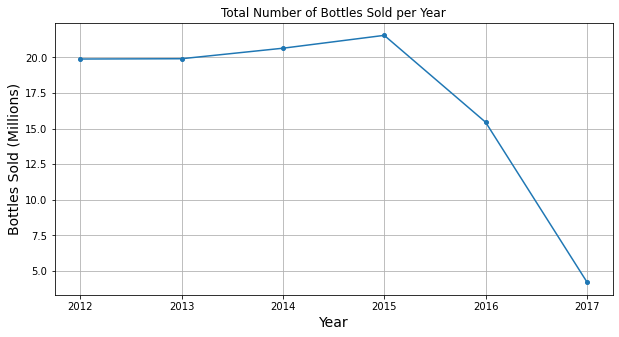

In [97]:
createLinePlt(YearSold, 'Year', 'Bottles Sold (Millions)', title='Total Number of Bottles Sold per Year',
          xlabel = 'Year', ylabel = 'Bottles Sold (Millions)')

### Total Sales per Year

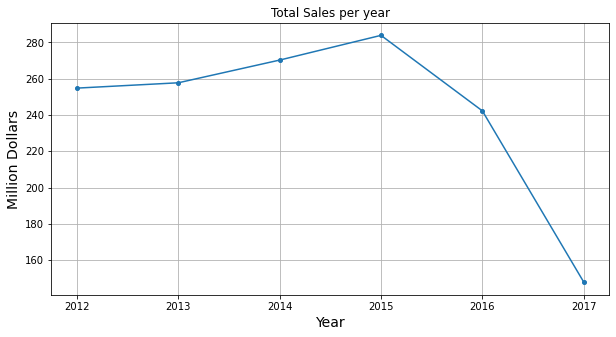

In [60]:
createLinePlt(YearSold, 'Year', 'Sale (Millions)', title='Total Sales per year',
          xlabel = 'Year', ylabel = 'Million Dollars')

### Total Sales per Month

In [113]:
MonthSold = df
MonthSold['Month'] = df['Date'].dt.strftime('%b')
MonthSold = MonthSold.groupby(['Month'])[['Bottle Volume (ml)', 'State Bottle Cost','State Bottle Retail',
                  'Bottles Sold','Sale (Dollars)','Volume Sold (Liters)','Volume Sold (Gallons)']].agg('sum').reset_index()
MonthSold

,Month,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,Apr,966422262,9900710.62,14875884.36,8885078,1.228662e+08,8220114.87,2170705.38
1,Aug,1041453751,10693147.61,16060128.71,8905002,1.256567e+08,8144944.40,2150453.98
2,Dec,1004944282,11065029.24,16634327.06,8861176,1.314690e+08,7949374.90,2098945.20
3,Feb,875472938,8962044.68,13463028.33,7992113,1.111871e+08,7515722.63,1984687.95
4,Jan,883682396,9022356.88,13548490.93,7607424,1.042606e+08,6921730.66,1827708.19
5,Jul,1023972620,10414786.42,15648721.55,8902086,1.224980e+08,8158113.50,2154240.38
6,Jun,1042444032,10690526.74,16063226.72,9549142,1.350793e+08,8872126.02,2342784.15
7,Mar,957028327,9884361.69,14841799.23,8327367,1.166328e+08,7514385.36,1984171.73
8,May,1034948672,10630040.20,15973056.09,9189069,1.290573e+08,8697781.18,2296685.52
9,Nov,779841826,8265466.91,12409184.92,6657421,9.715995e+07,5940288.45,1568289.65


In [114]:
#Conversion to Millions
MonthSold['Bottles Sold (Millions)'] = MonthSold['Bottles Sold'].div(1000000)
MonthSold['Sale (Millions)'] = MonthSold['Sale (Dollars)'].div(1000000)
MonthSold.drop(columns=['Bottles Sold'], inplace = True)
MonthSold.drop(columns=['Sale (Dollars)'], inplace = True)

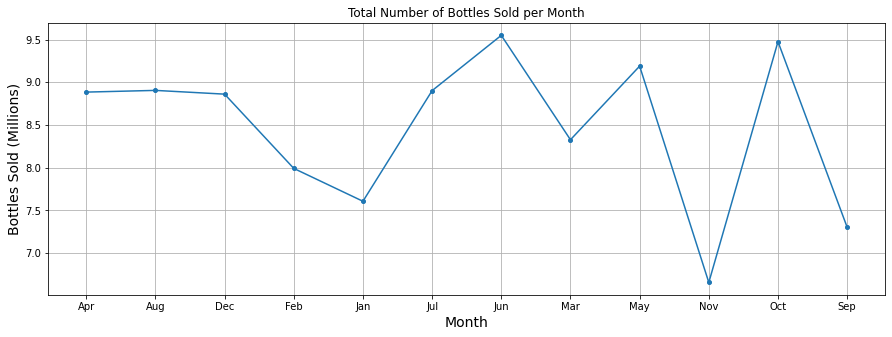

In [115]:
createLinePlt(MonthSold, 'Month', 'Bottles Sold (Millions)', title='Total Number of Bottles Sold per Month',
          xlabel = 'Month', ylabel = 'Bottles Sold (Millions)', figsize=(15,5))

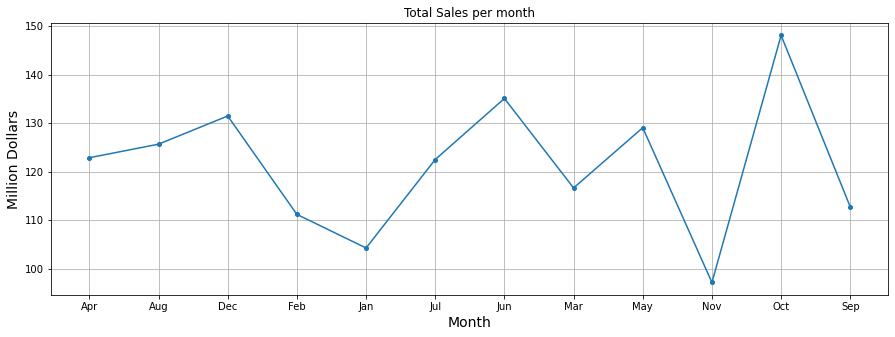

In [116]:
createLinePlt(MonthSold, 'Month', 'Sale (Millions)', title='Total Sales per month',
          xlabel = 'Month', ylabel = 'Million Dollars', figsize=(15,5))

It appears that there is time specifity in where the numbers of bottles sold is particularly higher compared to the other months